# Exponential Smoothing and it's Application to Data Filtering

## Introduction
In financial markets, data can often be noisy, making it difficult to discern underlying trends. One common method to filter this noise is exponential smoothing. This technique can help identify trends by giving more weight to recent data points while not discarding older data entirely.

## Exponential Smoothing Theory

### Simple Exponential Smoothing
Simple exponential smoothing (SES) is used to smooth a series \( y_t \) where \( t \) is the time period. 
The smoothed value \( S_t \) is computed using:

\[ S_t = \alpha y_t + (1 - alpha) S_{t-1} \]
where:
- \( alpha \) is the smoothing factor (0 < \( alpha \) < 1)
- \( y_t \) is the actual value at time \( t \)
- \( S_{t-1} \) is the previously smoothed value

### Choosing the Smoothing Factor
The smoothing factor \( alpha \) determines how quickly the weights of past observations decay. A smaller \( alpha \) gives more weight to older data, while a larger \( alpha \) gives more weight to recent data.


### Import Libraries and Load Data
First, we need to import necessary libraries and load the financial data.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

# Load the historical data for the SPY
ticker = 'SPY'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')
prices = data['Close'].values

[*********************100%%**********************]  1 of 1 completed


### Visualize the Data

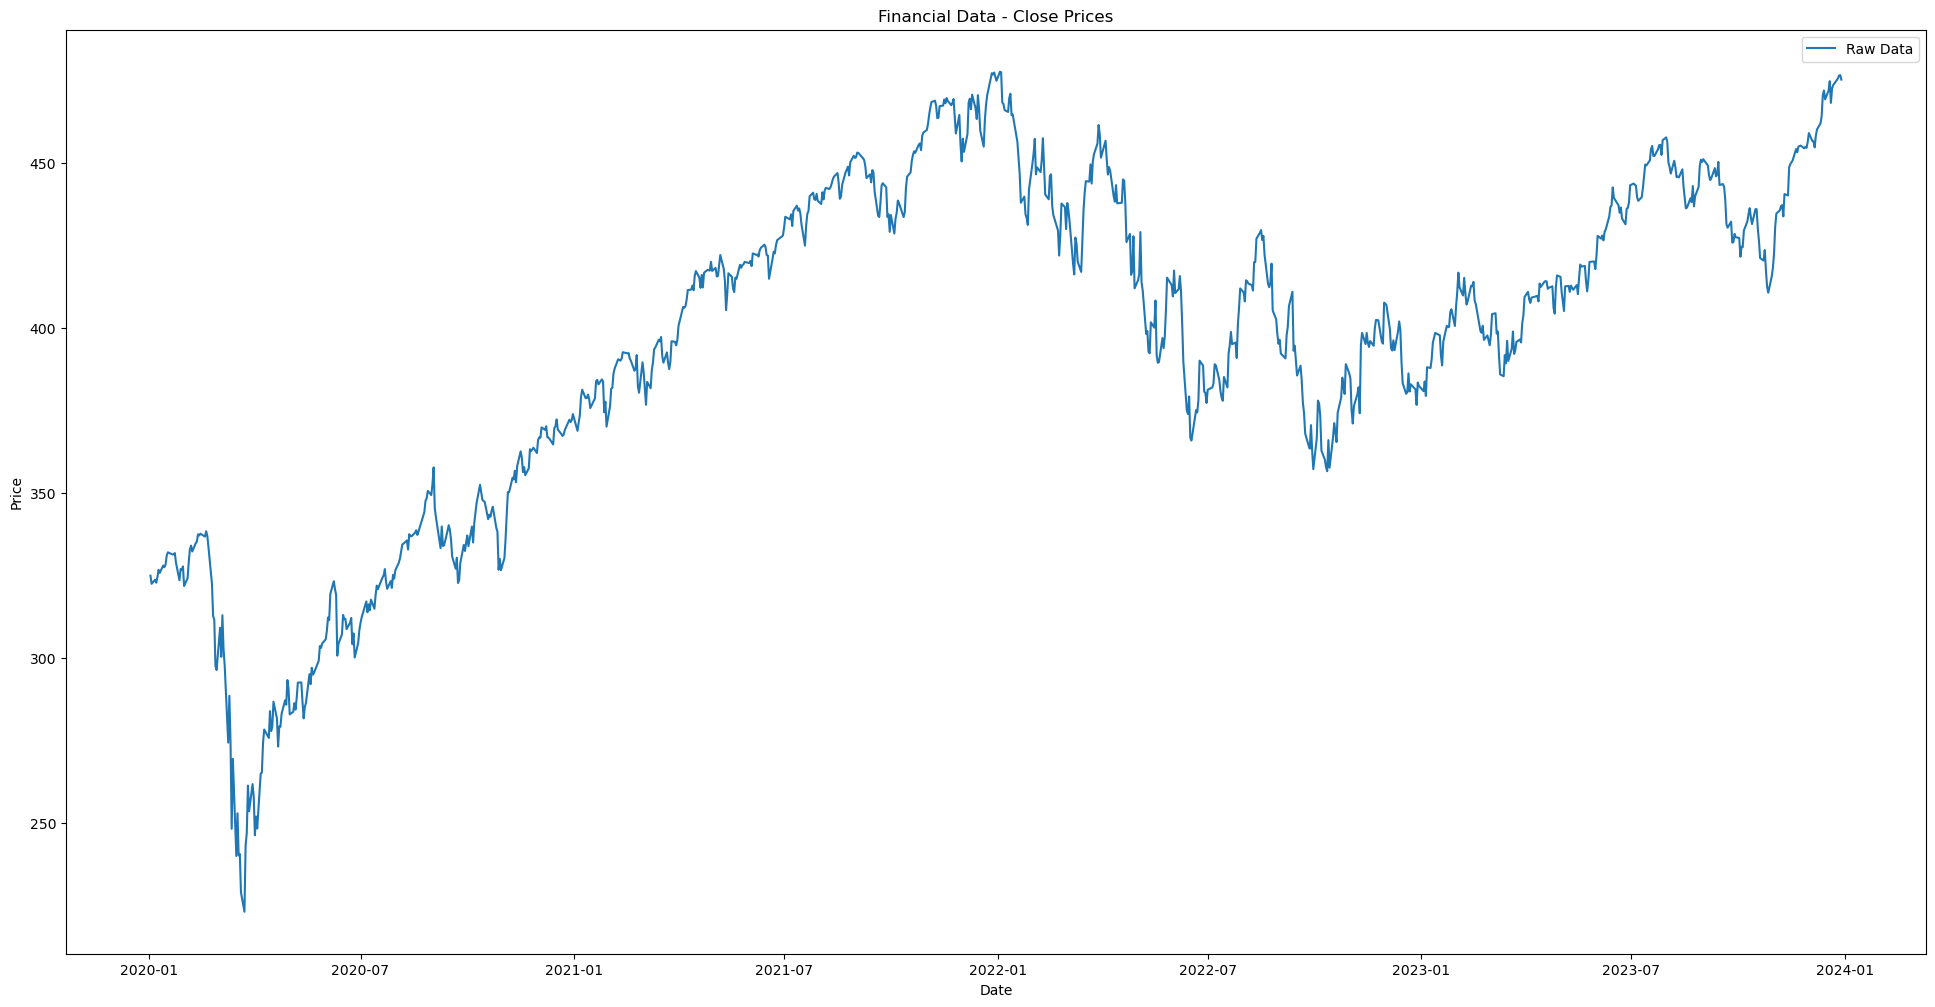

In [37]:
plt.figure(figsize=(24, 12))
plt.plot(data['Close'], label='Raw Data')
plt.title('Financial Data - Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Apply Simple Exponential Smoothing (SES)
As previously mentioned,Simple exponential smoothing (SES) is used to smooth a series \( y_t \) where \( t \) is the time period.

c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


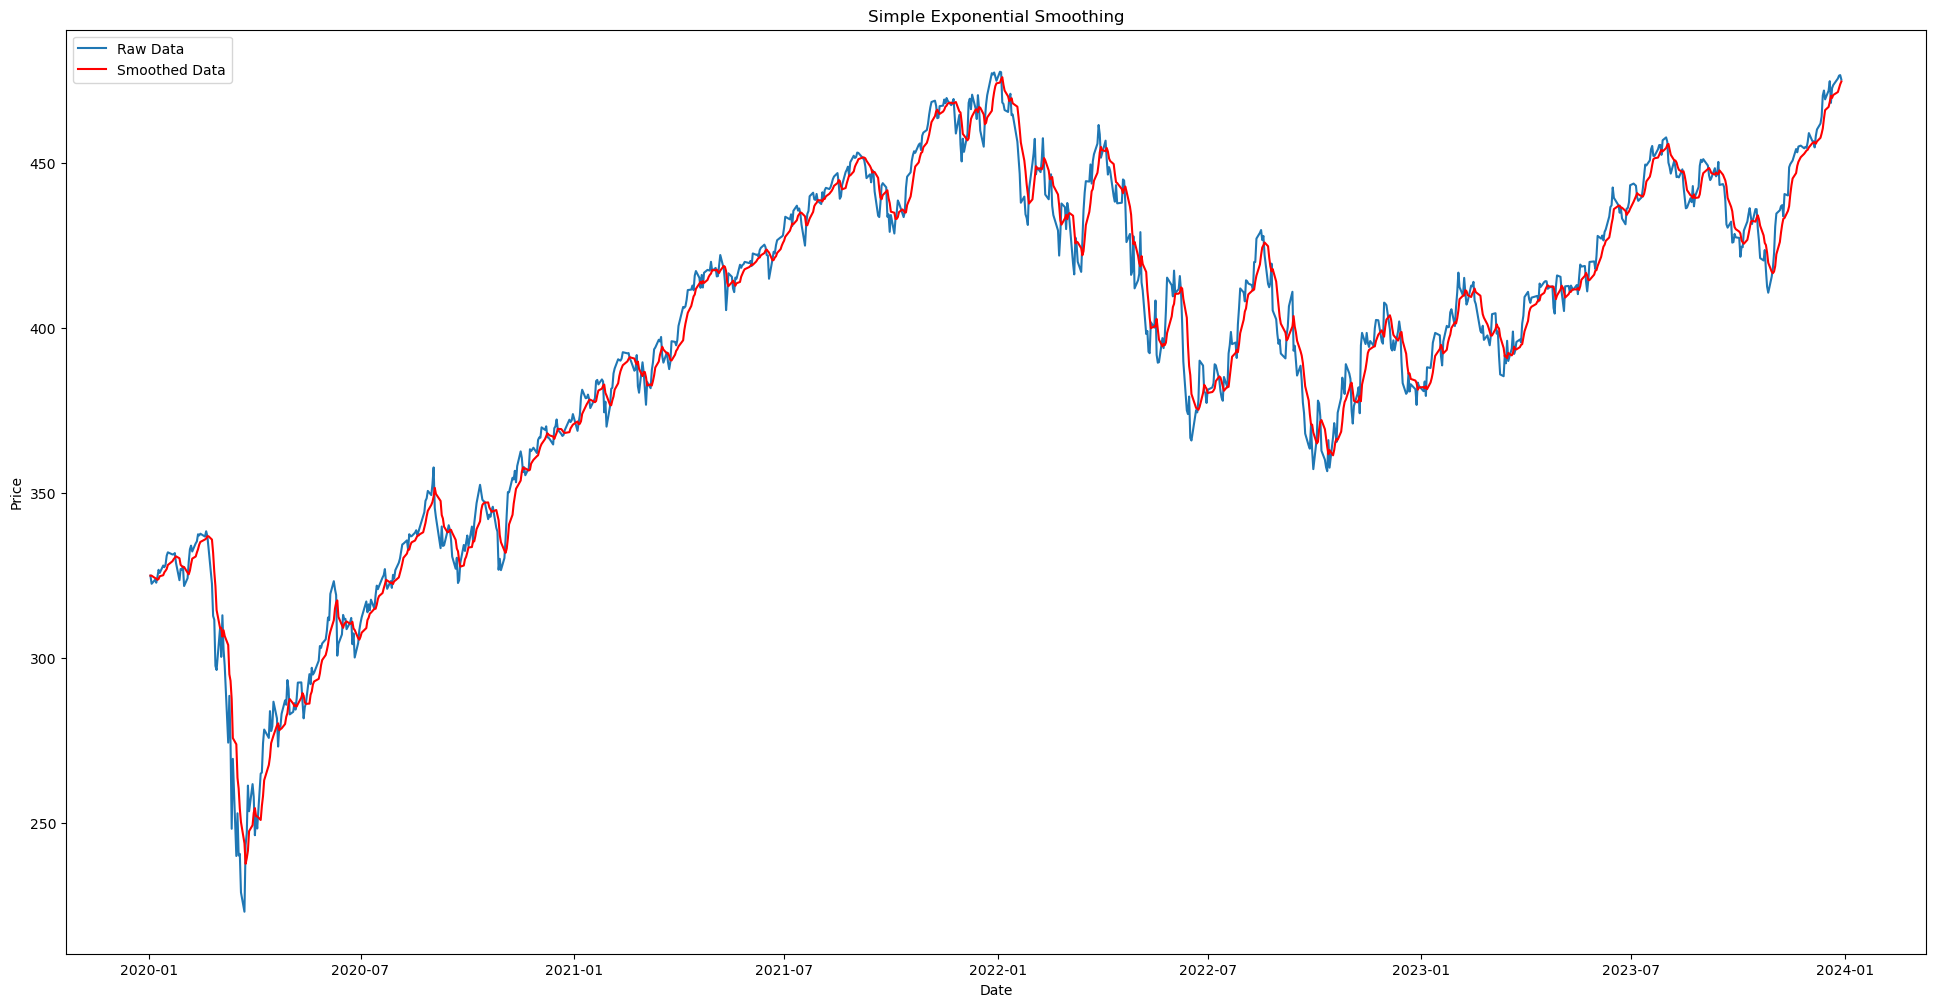

In [38]:
# Define the smoothing factor
alpha = 0.3

# Apply Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(data['Close']).fit(smoothing_level=alpha, optimized=False)
data['SES'] = ses_model.fittedvalues

# Visualize the smoothed data
plt.figure(figsize=(24, 12))
plt.plot(data['Close'], label='Raw Data')
plt.plot(data['SES'], label='Smoothed Data', color='red')
plt.title('Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Holt-Winters Seasonal Smoothing
### Theory
The Holt-Winters Seasonal Smoothing method extends exponential smoothing to capture both trend and seasonality in time series data. It consists of three components:

- Level: The smoothed value of the series.
- Trend: The smoothed trend value.
- Seasonality: The smoothed seasonal value.


The model is defined by:


𝑆 𝑡 = (𝐿 𝑡 − 1 + 𝑇 𝑡 −1 ) + 𝛼 (𝑦 𝑡 − 𝑆 𝑡 − 𝑚)

𝐿 𝑡 = 𝛼 (𝑦 𝑡 − 𝑆 𝑡 − 𝑚)  + (1 − 𝛼) (𝐿𝑡 − 1 + 𝑇𝑡 − 1)

𝑇𝑡 = 𝛽 (𝐿𝑡 − 𝐿𝑡 − 1) + (1 − 𝛽) Tt − 1

𝑆𝑡 = 𝛾 (𝑦𝑡 − 𝐿𝑡) + (1 − 𝛾) St − m
​


where 𝛼, 𝛽, and 𝛾 are the smoothing parameters for the level, trend, and seasonality, respectively, and 𝑚 is the length of the seasonal cycle.

### Applying Holt-Winters Seasonal Smoothing to the Financial Data

c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


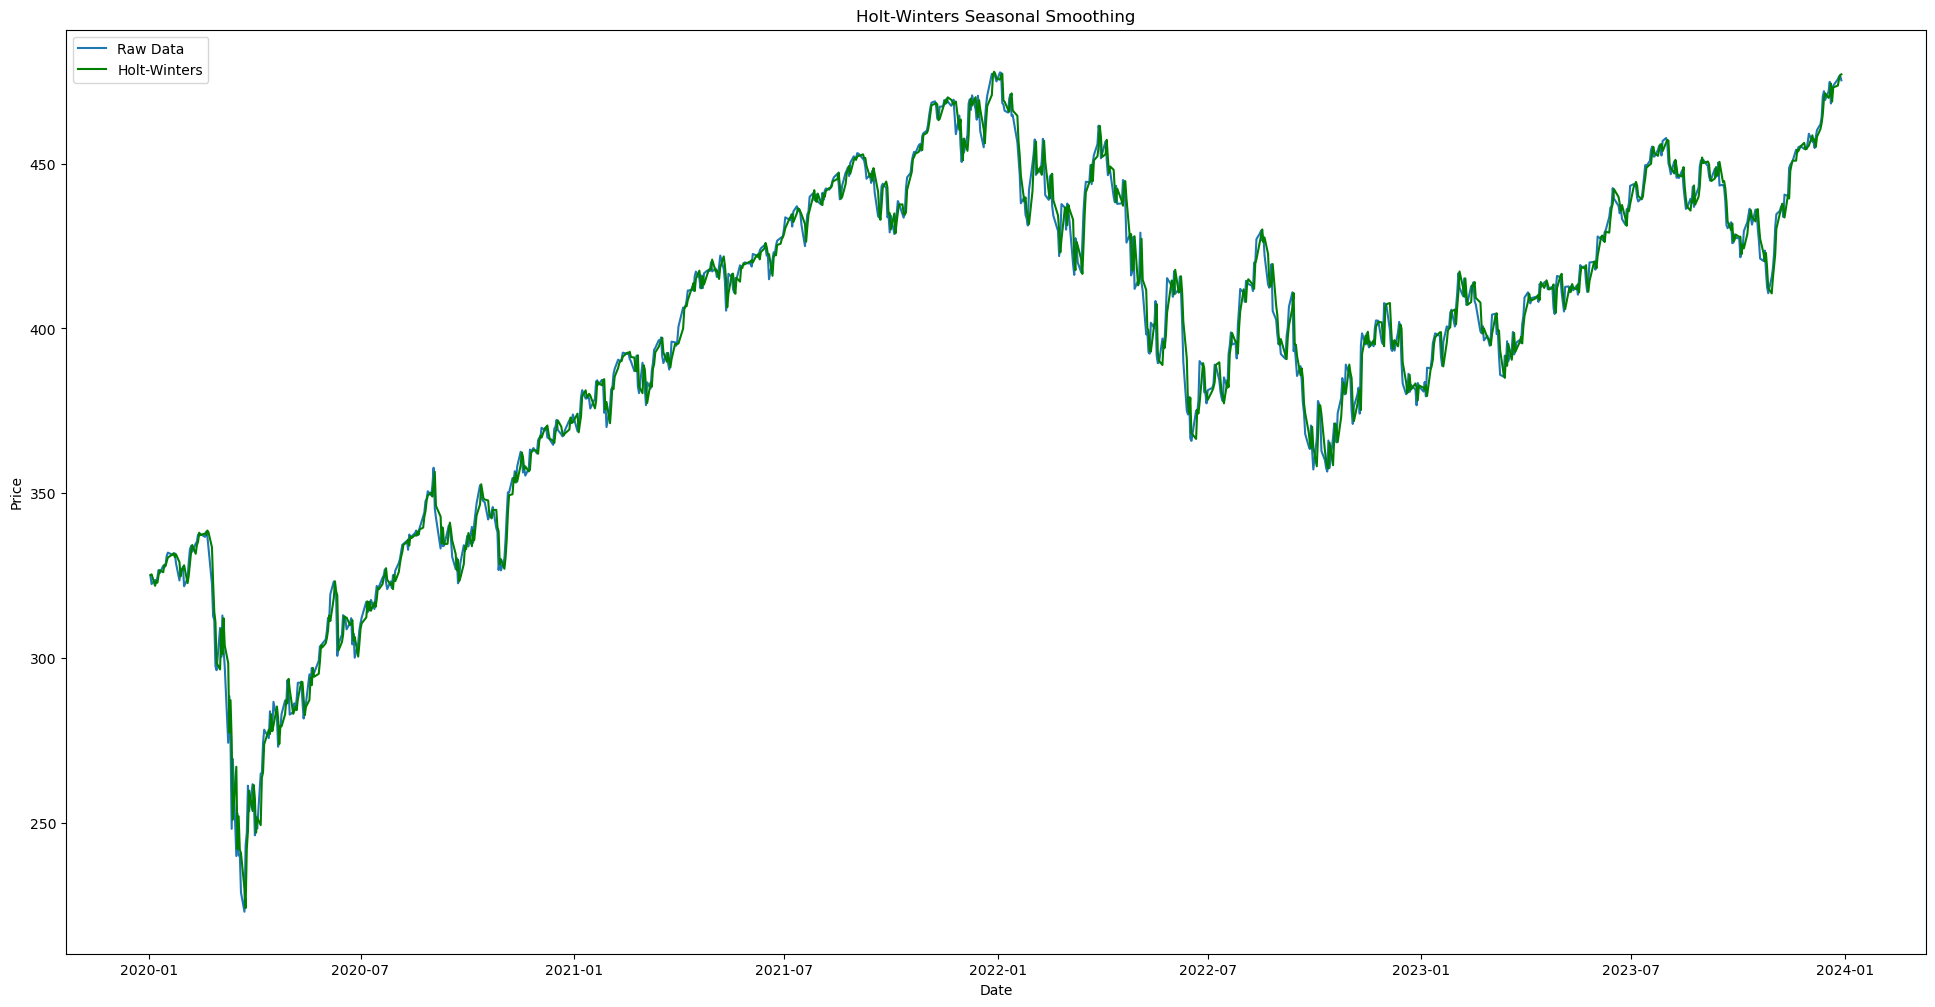

In [39]:
# Define the seasonal period
seasonal_periods = 12

# Apply Holt-Winters Seasonal Smoothing
hw_model = ExponentialSmoothing(data['Close'], seasonal='add', trend='add', seasonal_periods=seasonal_periods).fit()
data['HW'] = hw_model.fittedvalues

# Visualize the Holt-Winters Seasonal Smoothing
plt.figure(figsize=(24, 12))
plt.plot(data['Close'], label='Raw Data')
plt.plot(data['HW'], label='Holt-Winters', color='green')
plt.title('Holt-Winters Seasonal Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

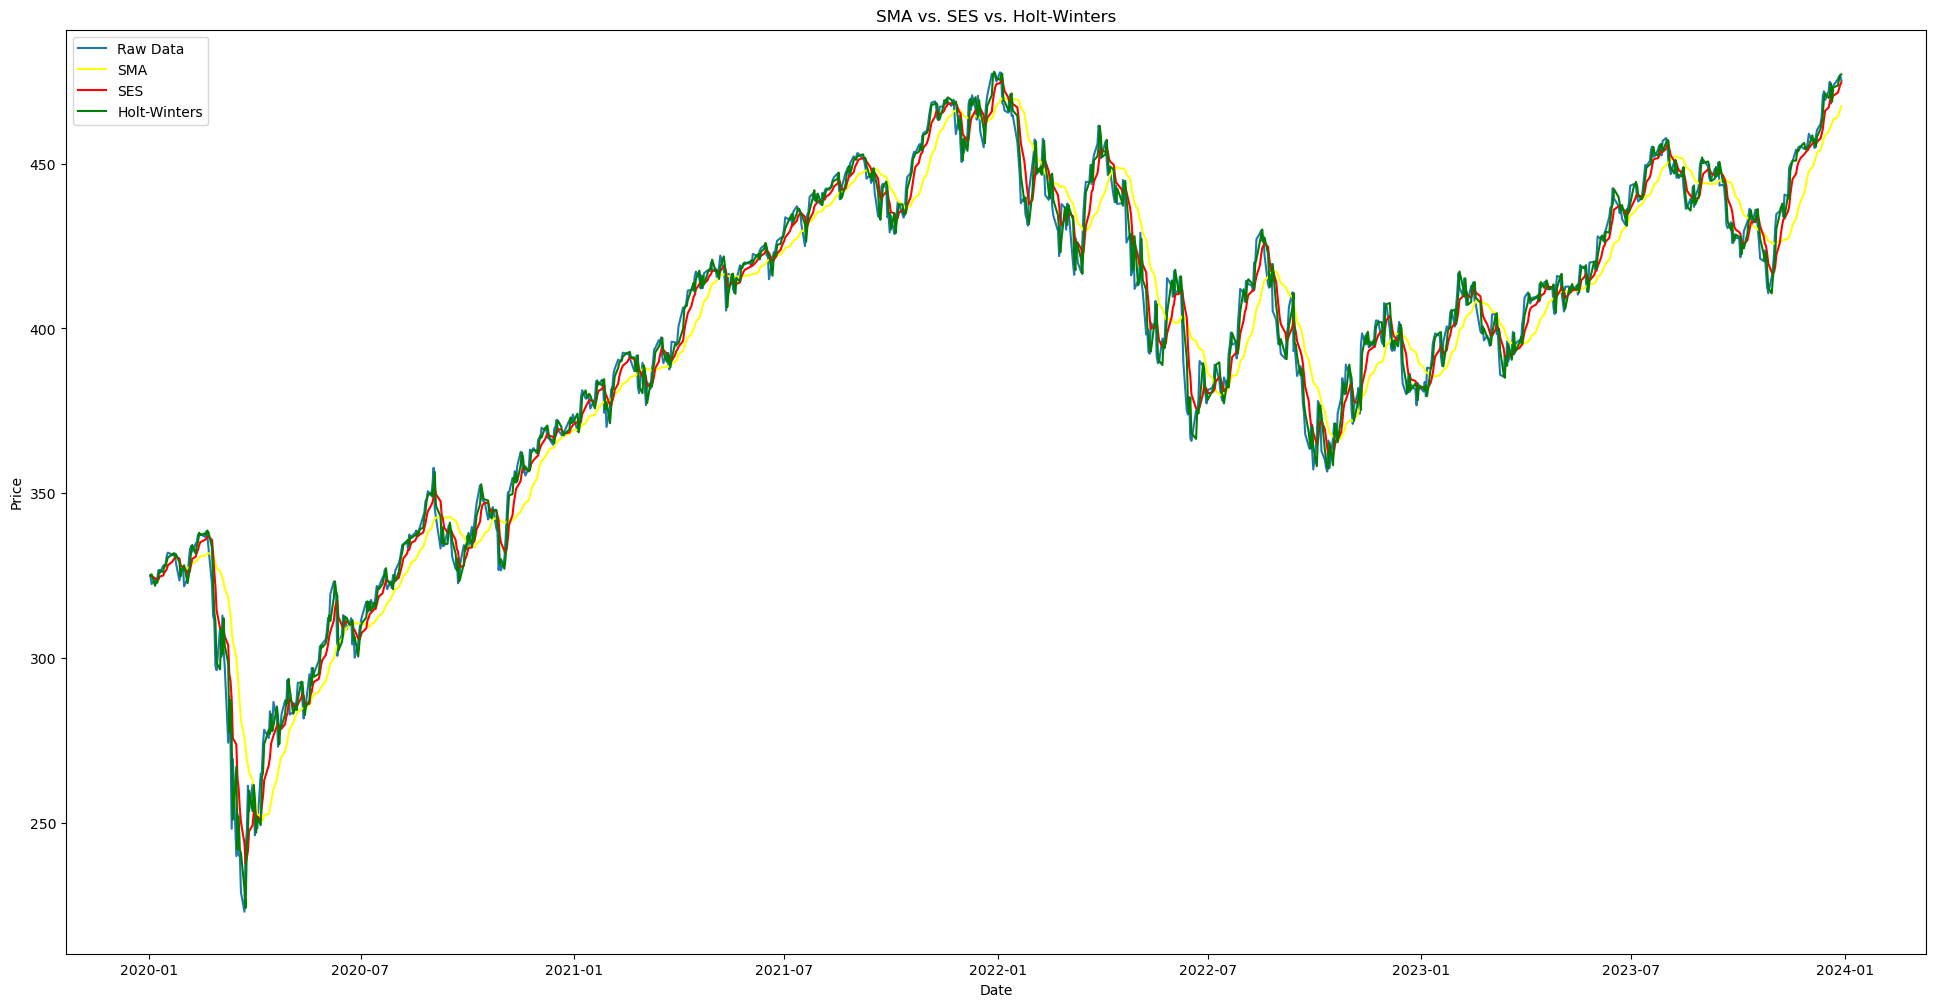

In [40]:
# Implement SMA
window_size = 20

# Apply Simple Moving Average
data['SMA'] = data['Close'].rolling(window=window_size).mean()


# Visualize SMA, SES, and Holt-Winters together
plt.figure(figsize=(24, 12))
plt.plot(data['Close'], label='Raw Data')
plt.plot(data['SMA'], label='SMA', color='yellow')
plt.plot(data['SES'], label='SES', color='red')
plt.plot(data['HW'], label='Holt-Winters', color='green')
plt.title('SMA vs. SES vs. Holt-Winters')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Differences
1. Weighting of Data Points:

- SMA: Assigns equal weight to all points within the window.
- SES: Assigns exponentially decreasing weights to older observations, giving more importance to recent data points.
- Holt-Winters: Captures both trend and seasonality, with parameters for level, trend, and seasonal smoothing.
2. Responsiveness:

- SMA: Less responsive to recent changes because it averages over a fixed window size.
- SES: More responsive to recent changes due to the exponential weighting.
- Holt-Winters: Highly responsive to both trend and seasonal changes, making it suitable for data with clear seasonality.
3. Complexity:

- SMA: Simpler to calculate and understand.
- SES: Slightly more complex due to the need to choose an appropriate smoothing factor (𝛼).
- Holt-Winters: More complex, requiring multiple parameters (𝛼, 𝛽, 𝛾) and handling of seasonality.
4. Lag:

- SMA: Introduces a lag equal to half the window size.
- SES: Generally introduces less lag compared to SMA, especially with a higher 𝛼.
- Holt-Winters: Can effectively minimize lag while capturing seasonality and trend.


**Choosing Between SMA, SES, and Holt-Winters**


The choice between SMA, SES, and Holt-Winters depends on the specific use case:

Use SMA for simplicity and when you need to smooth data over a fixed period.
Use SES when you want to give more importance to recent data and require a more responsive smoothing technique.
Use Holt-Winters when your data has a clear seasonal component and you need to account for both trend and seasonality.
### Conclusion
Moving Average, Exponential Smoothing, and Holt-Winters Seasonal Smoothing are effective techniques for filtering noise from financial data. Each method has its strengths and is suitable for different types of data and analysis needs.